In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os

plt.style.use('ggplot')

In [4]:
with open('results/no_overlap_single_task.pkl', 'rb') as f:
    no_overlap_metrics = pickle.load(f)
    single_task_single_shot_metrics = no_overlap_metrics['single_shot']
    single_task_ar_metrics = no_overlap_metrics['auto_regressive']

with open('results/all_results.pkl', 'rb') as f:
    no_overlap_metrics = pickle.load(f)
    multi_task_single_shot_metrics = no_overlap_metrics['single_shot']
    multi_task_ar_metrics = no_overlap_metrics['auto_regressive']

Model: Single-Task Single Shot
Loss (MSE): 0.014609364792704582
RMSE: 0.1199866955478986
MAE: 0.08321057508389156
R² Score: 0.6911923817356431

Model: Single-Task Autoregressive
Loss (MSE): 0.006445898053546746
RMSE: 0.07919661949078242
MAE: 0.056023430079221725
R² Score: 0.8965338748142856

Model: Multi-Task Single-Shot
Loss (MSE): 0.003729703101830987
RMSE: 0.060402146325661585
MAE: 0.04322035094866386
R² Score: 0.9480227249831857

Model: Multi-Task Autoregressive
Loss (MSE): 0.0016193995811940671
RMSE: 0.039879082272259087
MAE: 0.028973833442880556
R² Score: 0.9367366532539827



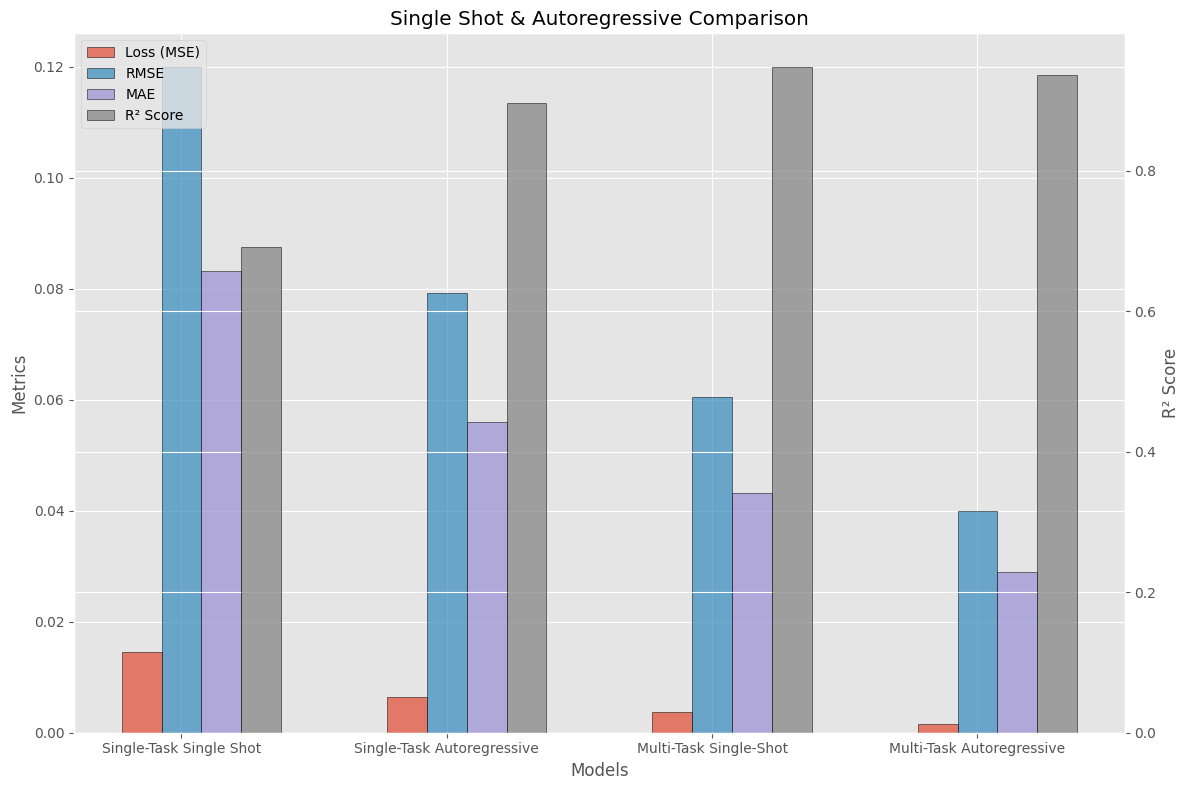

In [7]:
import matplotlib.pyplot as plt

# Model names and metrics
models = ['Single-Task Single Shot', 'Single-Task Autoregressive', 'Multi-Task Single-Shot', 'Multi-Task Autoregressive']
loss = [single_task_single_shot_metrics[0], single_task_ar_metrics[0], multi_task_single_shot_metrics[0], multi_task_ar_metrics[0]]
rmse = [single_task_single_shot_metrics[1], single_task_ar_metrics[1], multi_task_single_shot_metrics[1], multi_task_ar_metrics[1]]
mae = [single_task_single_shot_metrics[2], single_task_ar_metrics[2], multi_task_single_shot_metrics[2], multi_task_ar_metrics[2]]
r_squared = [single_task_single_shot_metrics[3], single_task_ar_metrics[3], multi_task_single_shot_metrics[3], multi_task_ar_metrics[3]]

for i, model in enumerate(models):
    print(f"Model: {model}")
    print(f"Loss (MSE): {loss[i]}")
    print(f"RMSE: {rmse[i]}")
    print(f"MAE: {mae[i]}")
    print(f"R² Score: {r_squared[i]}\n")

x = range(len(models))
width = 0.15

fig, ax1 = plt.subplots(figsize=(12, 8))

# Plotting Loss, RMSE, and MAE with primary y-axis and a higher zorder to bring bars to the front
bars1 = ax1.bar(x, loss, width, label='Loss (MSE)', align='center', alpha=0.7, edgecolor='black', zorder=3)
bars2 = ax1.bar([p + width for p in x], rmse, width, label='RMSE', align='center', alpha=0.7, edgecolor='black', zorder=3)
bars3 = ax1.bar([p + width*2 for p in x], mae, width, label='MAE', align='center', alpha=0.7, edgecolor='black', zorder=3)

ax1.set_xlabel('Models')
ax1.set_ylabel('Metrics')
ax1.set_title('Single Shot & Autoregressive Comparison')
ax1.set_xticks([p + width for p in x])
ax1.set_xticklabels(models)

# Creating a secondary y-axis for R² scores
ax2 = ax1.twinx()
# Plotting R² bars with a lower zorder to ensure they don't overlap the primary bars
bars4 = ax2.bar([p + width*3 for p in x], r_squared, width, label='R² Score', align='center', alpha=0.7, edgecolor='black', color='grey', zorder=2)
ax2.set_ylabel('R² Score')

# Combining legends from both y-axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.savefig('figures/Single & Multi-Task Model Comparison.jpg', format='jpg', bbox_inches='tight', dpi = 300)

plt.show()
